In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [2]:
tickers = ['PG', 'MSFT', 'F', 'GE']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo', start='1995-1-1')['Adj Close']

In [3]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5595 entries, 1995-01-03 to 2017-03-22
Data columns (total 4 columns):
PG      5595 non-null float64
MSFT    5595 non-null float64
F       5595 non-null float64
GE      5595 non-null float64
dtypes: float64(4)
memory usage: 218.6 KB


In [4]:
mydata.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,9.168104,2.538824,5.291710,4.562831
1995-01-04,9.094613,2.557278,5.434087,4.562831
1995-01-05,8.966002,2.515096,5.386628,4.574014
1995-01-06,8.984375,2.557278,5.386628,4.551648
1995-01-09,8.947629,2.541460,5.481547,4.506914


In [5]:
mydata.tail()

,PG,MSFT,F,GE
Date,,,,
2017-03-16,91.440002,64.639999,12.70,29.750000
2017-03-17,91.000000,64.870003,12.48,29.879999
2017-03-20,91.220001,64.930000,12.28,29.740000
2017-03-21,91.190002,64.209999,11.72,29.389999
2017-03-22,90.989998,65.029999,11.77,29.530001


### Normalization to 100:

$$
\frac {P_t}{P_0} * 100
$$

In [6]:
mydata.iloc[0]

PG      9.168104
MSFT    2.538824
F       5.291710
GE      4.562831
Name: 1995-01-03 00:00:00, dtype: float64

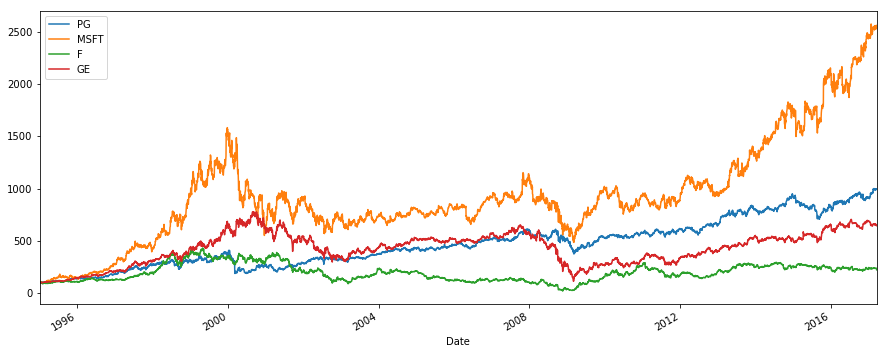

In [7]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

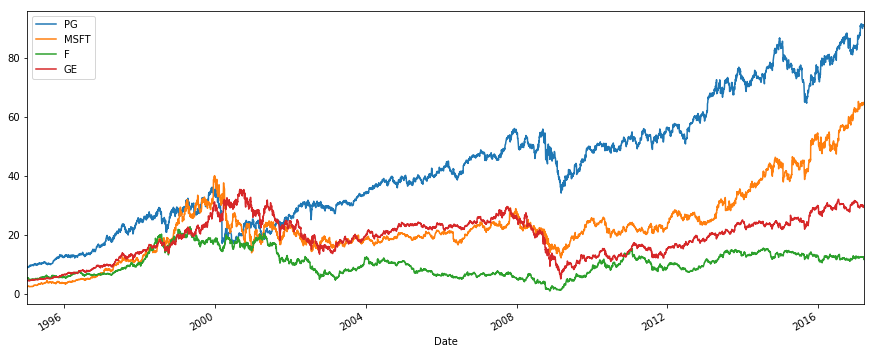

In [8]:
mydata.plot(figsize=(15,6))
plt.show()

In [9]:
mydata.loc['1995-01-03']

PG      9.168104
MSFT    2.538824
F       5.291710
GE      4.562831
Name: 1995-01-03 00:00:00, dtype: float64

In [10]:
mydata.iloc[0]

PG      9.168104
MSFT    2.538824
F       5.291710
GE      4.562831
Name: 1995-01-03 00:00:00, dtype: float64

## Calculating the Return of a Portfolio of Securities

In [11]:
returns = (mydata / mydata.shift(1)) - 1
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026906,0.000000
1995-01-05,-0.014141,-0.016495,-0.008734,0.002451
1995-01-06,0.002049,0.016772,0.000000,-0.004890
1995-01-09,-0.004090,-0.006185,0.017621,-0.009828


In [12]:
weights = np.array([0.25, 0.25, 0.25, 0.25])

In [13]:
np.dot(returns, weights)

array([        nan,  0.00653961, -0.00922975, ..., -0.00434214,
       -0.01719726,  0.00490178])

***

In [14]:
annual_returns = returns.mean() * 250
annual_returns

PG      0.128590
MSFT    0.196030
F       0.117966
GE      0.126426
dtype: float64

In [15]:
np.dot(annual_returns, weights)

0.14225289130269819

In [16]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 5) * 100) + ' %'
print pfolio_1

14.225 %


***

In [17]:
weights_2 = np.array([0.4, 0.4, 0.15, 0.05])

In [18]:
pfolio_2 = str(round(np.dot(annual_returns, weights_2), 5) * 100) + ' %'
print pfolio_1
print pfolio_2

14.225 %
15.386 %
